In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import ipywidgets
from datetime import datetime
import seaborn as sns

#  Data Visualization

Data visualization is a way we visual communicate insights about the data. In order to comunicate information clearly and efficiently we rely on statistical graphics, plots, and other tools. Effective visualizations allows us to help other analyze and reason about data. Data visualization is both an art and a science. Data visualization is one part of the data science process.

## Four Basic Methods of Data Visualization

In [2]:
df = pd.read_csv("data/android_adware.csv")

### Dataset Description

The Android Malware Dataset (CICAndMal2017), malware samples in dataset are adware.

* Dowgin family
* Ewind family
* Feiwo family
* Gooligan family
* Kemoge family
* koodous family
* Mobidash family
* Selfmite family
* Shuanet family
* Youmi family

The dataset is based on the captured network traffic features (.pcap files), and extracted more than 80 features by using CICFlowMeter-V3 during three states (installation, before restart, and after restart).

Reference: Arash Habibi Lashkari, Andi Fitriah A. Kadir, Laya Taheri, and Ali A. Ghorbani, “Toward Developing a Systematic Approach to Generate Benchmark Android Malware Datasets and Classification”, In the proceedings of the 52nd IEEE International Carnahan Conference on Security Technology (ICCST), Montreal, Quebec, Canada, 2018.

In [3]:
df.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,10.42.0.151-31.13.71.1-57050-443-6,31.13.71.1,443,10.42.0.151,57050,6,13/06/2017 03:16:08,15,2,0,...,32,0,0,0,0,0,0,0,0,ADWARE_EWIND
1,10.42.0.151-31.13.71.1-57050-443-6,10.42.0.151,57050,31.13.71.1,443,6,13/06/2017 03:16:08,10067,3,0,...,32,0,0,0,0,0,0,0,0,ADWARE_EWIND
2,157.55.130.167-10.42.0.151-40019-50481-6,10.42.0.151,50481,157.55.130.167,40019,6,13/06/2017 03:16:11,45658,1,1,...,32,0,0,0,0,0,0,0,0,ADWARE_EWIND
3,10.42.0.151-52.179.153.195-60517-443-6,10.42.0.151,60517,52.179.153.195,443,6,13/06/2017 03:16:11,50235,1,1,...,32,0,0,0,0,0,0,0,0,ADWARE_EWIND
4,10.42.0.151-104.46.97.194-54219-443-6,10.42.0.151,54219,104.46.97.194,443,6,13/06/2017 03:16:11,50260,1,1,...,32,0,0,0,0,0,0,0,0,ADWARE_EWIND


Wow! OK, so, we have a column for the network flow on our malware. Let's get to know our data.

In [4]:
df.columns

Index(['Flow ID', 'Source IP', 'Source Port', 'Destination IP',
       'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration',
       'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
  

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32357 entries, 0 to 32356
Data columns (total 85 columns):
Flow ID                        32357 non-null object
Source IP                      32357 non-null object
Source Port                    32357 non-null object
Destination IP                 32357 non-null object
Destination Port               32357 non-null object
Protocol                       32357 non-null object
Timestamp                      32357 non-null object
Flow Duration                  32357 non-null object
Total Fwd Packets              32357 non-null object
Total Backward Packets         32357 non-null object
Total Length of Fwd Packets    32357 non-null object
Total Length of Bwd Packets    32357 non-null object
Fwd Packet Length Max          32357 non-null object
Fwd Packet Length Min          32357 non-null object
Fwd Packet Length Mean         32357 non-null object
Fwd Packet Length Std          32357 non-null object
Bwd Packet Length Max          32357 non-nu

There are four basic methods of data analysis that help us turn data into knowledge:

* Comparison
* Composition
* Distribution
* Relationship


## Comparison

Comparison is probably the most common and easy-to-understand method for data analysis. The goal is to use comparison in order to evaluate and compare values between two or more data points. For example, comparison can be used to find the lowest and highest values in the chart.

The most common subset of comparison charts are called <b>trends</b>. Trend charts usually have a time axis and one or several value axes, which are used to show how a data set performed during a specific time period.

Comparisons are typically made with the following goals:
* To compare two or more values side by side to visually grasp the difference
* To list key values to quickly find and read them (i.e., revenue per month)
* To rank several data categories from best to worst or the other way around
* To show pattern recognition by visualing highlighting gaps, spikes, outliers, or trends

The best char types to use for data comparison include:
* column
* bar
* line or time-line

Let's build bar chart to compare the flow duration.

In [6]:
df['Flow Duration'] = pd.to_numeric(df['Flow Duration'], errors='coerce')

[Text(0, 0, '443'),
 Text(0, 0, '57050'),
 Text(0, 0, '50481'),
 Text(0, 0, '60517'),
 Text(0, 0, '54219'),
 Text(0, 0, '56696'),
 Text(0, 0, '55083'),
 Text(0, 0, '48664'),
 Text(0, 0, '56349'),
 Text(0, 0, '52297'),
 Text(0, 0, '46731'),
 Text(0, 0, '443'),
 Text(0, 0, '59746'),
 Text(0, 0, '37195'),
 Text(0, 0, '52011')]

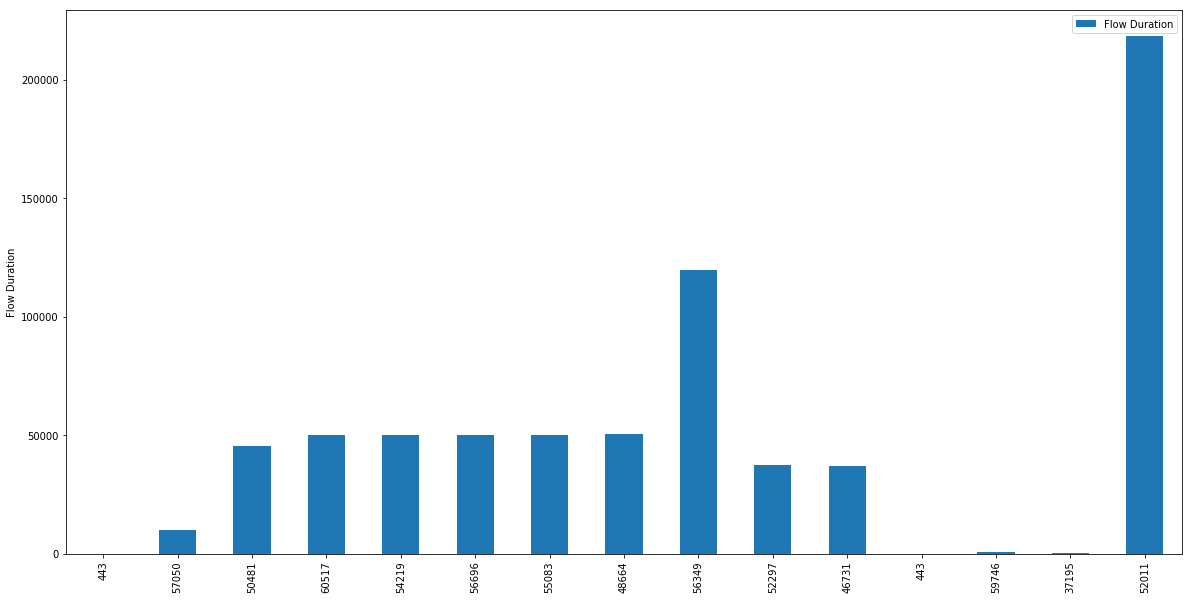

In [7]:
plt.rcParams["figure.figsize"] = [20,10]
ax = df[['Source Port', 'Flow Duration']].head(15).plot(kind='bar', rot=90)
x_labels = df['Source Port']
ax.set_ylabel("Flow Duration")
ax.set_xticklabels(x_labels)

The chart above allows us to examine flow duration of each port from our data. As we can see, alot of these adware is using non-standard ports. We are also able to examine the fact that port 52011 has the highest flow duration, and port 37195 has the lowest. Another comparison chart is a timeline.

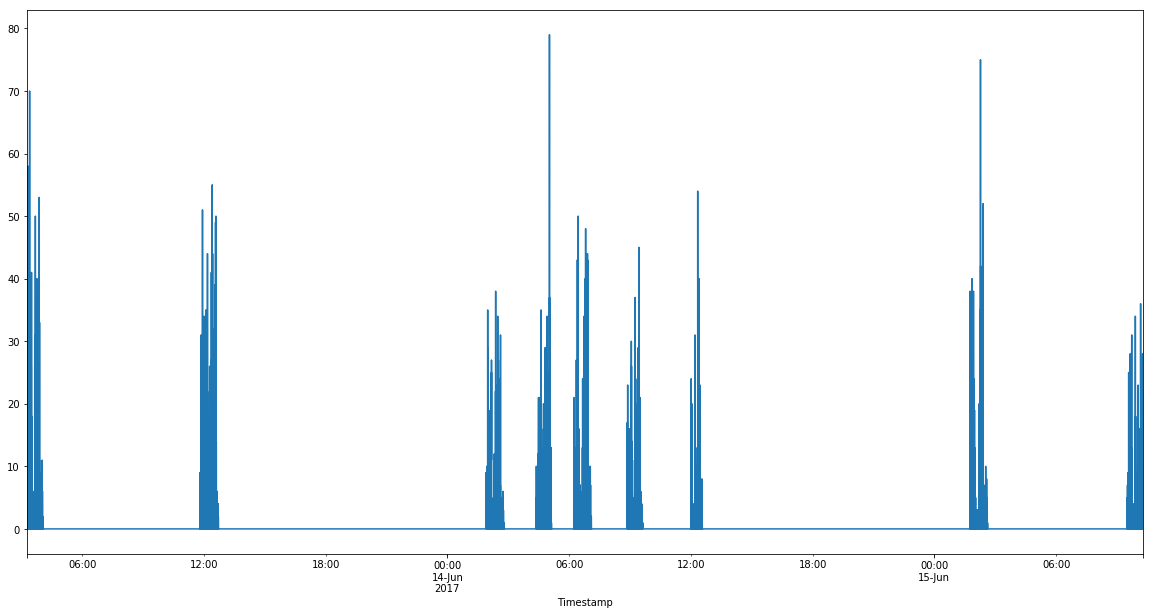

In [8]:
df['Timestamp']  = pd.to_datetime(df['Timestamp'], dayfirst=True, errors='coerce')
ts = df.set_index('Timestamp')
ts['Flow ID'].resample('1S').count().plot()

Here we compare the number of flow ids overtime, we are able to detect spikes in activity.

### Exercise 1

Take some time and build your own comparision chart.

## Composition

Composition of data is probably the most misused method in data representation endeavors.

The idea is to show how individual parts make up the whole by combining them together and displaying them as a sum. Composition can also be used to show how a total value can be divided into parts or to highlight the significance of each part relative to the total value.

A typical misuse of this presentation type is done when there are too many parts, too many composition sets, the value differences between parts are too big, or any combination of this.

Use data composition charts to show

* Company market share and a few key players in the market
* Total country population by TOP religions, languages, or ethnical groups
* Total revenue, by TOP product lines, divisions, or regions

Charts typically used for compositions include:

* Stacked bars or columns
* Pie or donut charts
* Stacked area charts
* Waterfall charts

Quite a few people would argue that you should not use pie or donut charts because people are bad at evaluating angles. Some would say that you should avoid stacked area charts and waterfall charts because those are confusing and are often misunderstood.

We will build a composition chart in order to display the composition of packets both forward and backward.

In [9]:
df['Total Fwd Packets'] = pd.to_numeric(df['Total Fwd Packets'], errors='coerce')
df['Total Backward Packets'] = pd.to_numeric(df['Total Backward Packets'], errors='coerce')

[Text(0, 0, 'ADWARE_EWIND'),
 Text(0, 0, 'ADWARE_EWIND'),
 Text(0, 0, 'ADWARE_EWIND'),
 Text(0, 0, 'ADWARE_EWIND'),
 Text(0, 0, 'ADWARE_EWIND'),
 Text(0, 0, 'ADWARE_EWIND'),
 Text(0, 0, 'ADWARE_EWIND'),
 Text(0, 0, 'ADWARE_EWIND'),
 Text(0, 0, 'ADWARE_EWIND'),
 Text(0, 0, 'ADWARE_EWIND')]

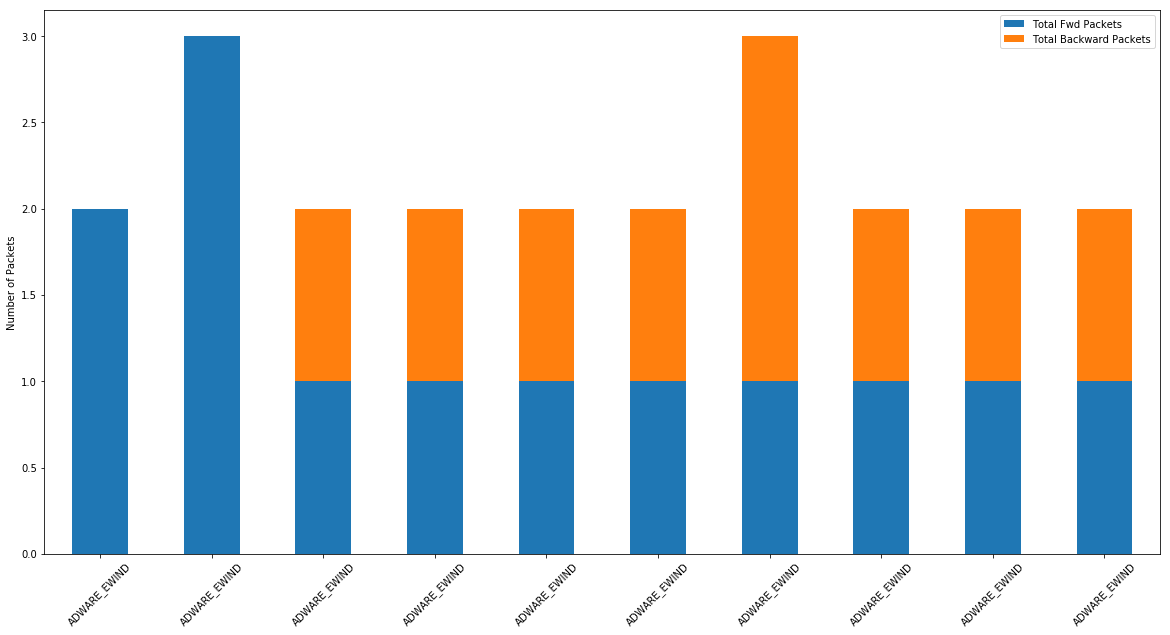

In [10]:
ax = df[['Total Fwd Packets', 'Total Backward Packets']].head(10).plot(kind='bar', stacked=True, rot=45)
x_labels = df['Label']
ax.set_ylabel("Number of Packets")
ax.set_xticklabels(x_labels)

We can also look at the composition of the data by examining the amount of each type of malware.

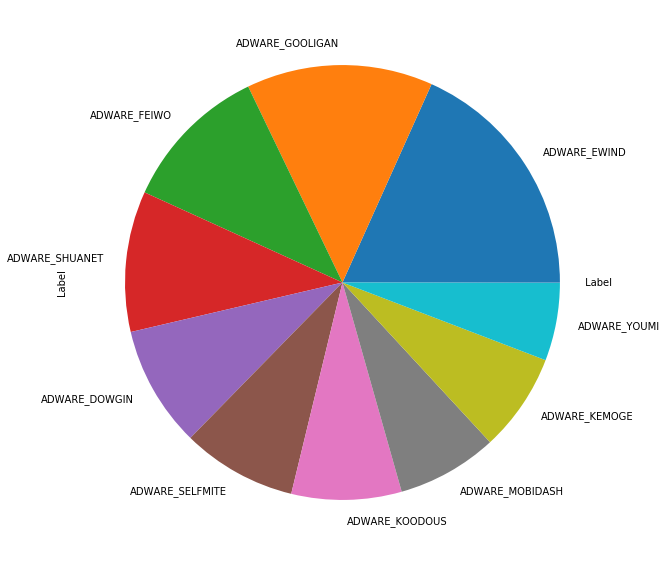

In [11]:
df['Label'].value_counts().plot(kind='pie')

### Exercise 2

Build your own composition chart

## Distribution

A distribution combines the merits and functionality of both Comparison and Composition. It can help you see the full data spectrum and visualize related or unrelated data points. With distribution you can see if there are any correlations, trends, patterns, shapes, clusters, averages, or outliers.

A very common subset of distribution analysis often used in business reporting is Deviation or Variance analysis. These methods let you see which values deviate from the norm. Understanding deviations from targets, budgets, or growth rates is a common requirement in almost any company.

Use a distribution or deviation visualizations chart to:

* Visualize the distribution of ages in a group of people
* Visualize the correlations between cause and effect
* Spot bugs or constraints in production or quality control systems
* Visualize sales in various stores, to spot best and worst performing ones

Charts typically used for Distribution and Deviation:
* Column and bar histogram charts
* Line and area charts
* Scatter plot charts
* Data tables
* Map charts


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fef4fb77e10>,
      dtype=object)

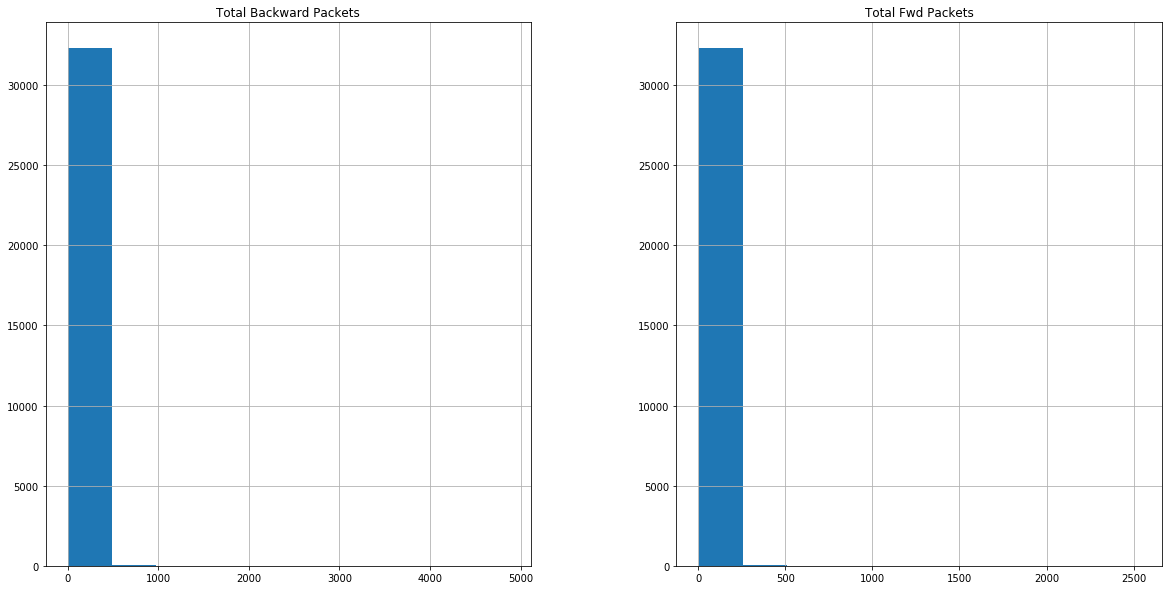

In [12]:
df[['Total Fwd Packets', 'Total Backward Packets']].hist()

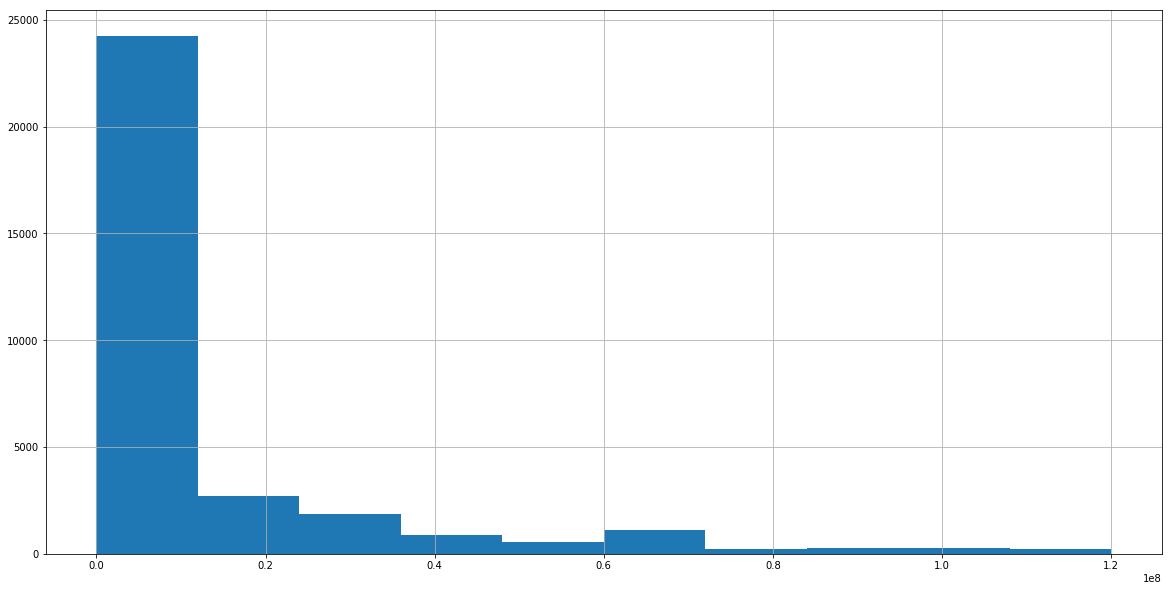

In [15]:
df['Flow Duration'].hist()

### Exercise 3
Build your own distribution chart.

## Relationship

As the name suggests, these types of charts show the relationship, correlation, or connection of two or more variables and their properties.

A good use of relationship graphs would be to demonstrate how something does or does not affect another variable positively or negatively. Somewhat similarly to distribution, you can use data relationships to find correlations, trends, patterns, clusters, averages, or outliers.

Use a relationship chart to:

* Estimate how marketing expenditures affect sales and profit.
* Spot flaws in effectiveness by evaluating expenses vs. income by store or region.
* Answer questions such as, “Does income level depend on IQ?” or “Do top tier business school graduates earn more in their careers?”

Charts typically used for relationship charts:

* Scatter plot (typically with two dimensions)
* Bubble (three to four dimensions, using bubble size and color scale, or five dimensions with animation or layers)
* Line (or lines, with two or more axes)
* Table charts


In [16]:
df['Fwd Packet Length Max'] = pd.to_numeric(df['Fwd Packet Length Max'], errors='coerce')
df['Bwd Packet Length Max'] = pd.to_numeric(df['Bwd Packet Length Max'], errors='coerce')

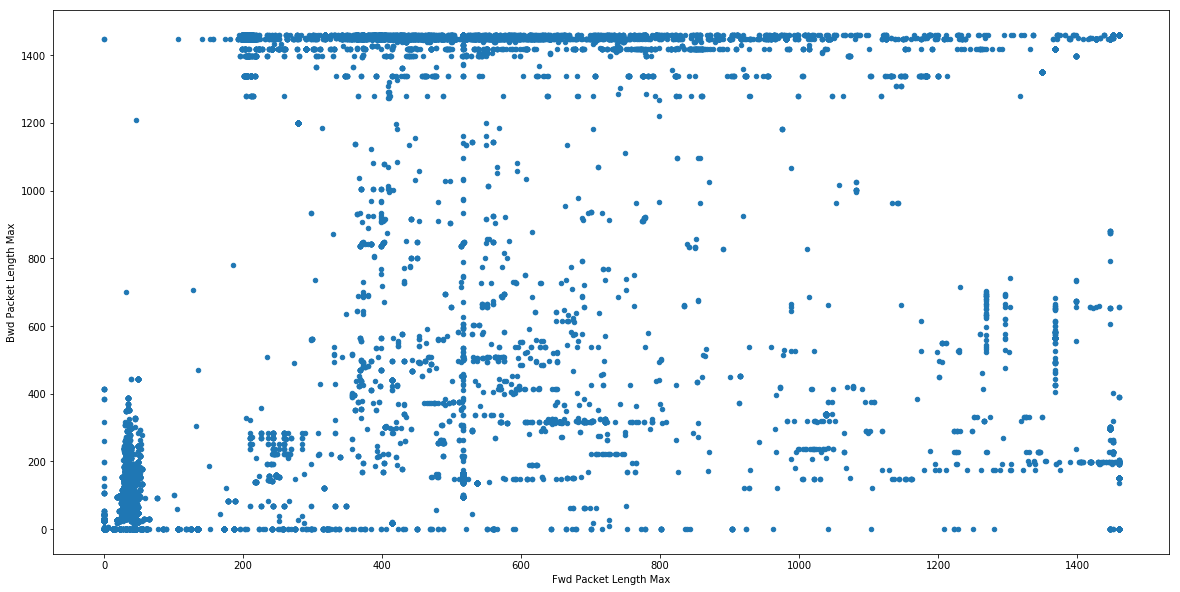

In [17]:
df.plot(kind='scatter', x='Fwd Packet Length Max', y='Bwd Packet Length Max')

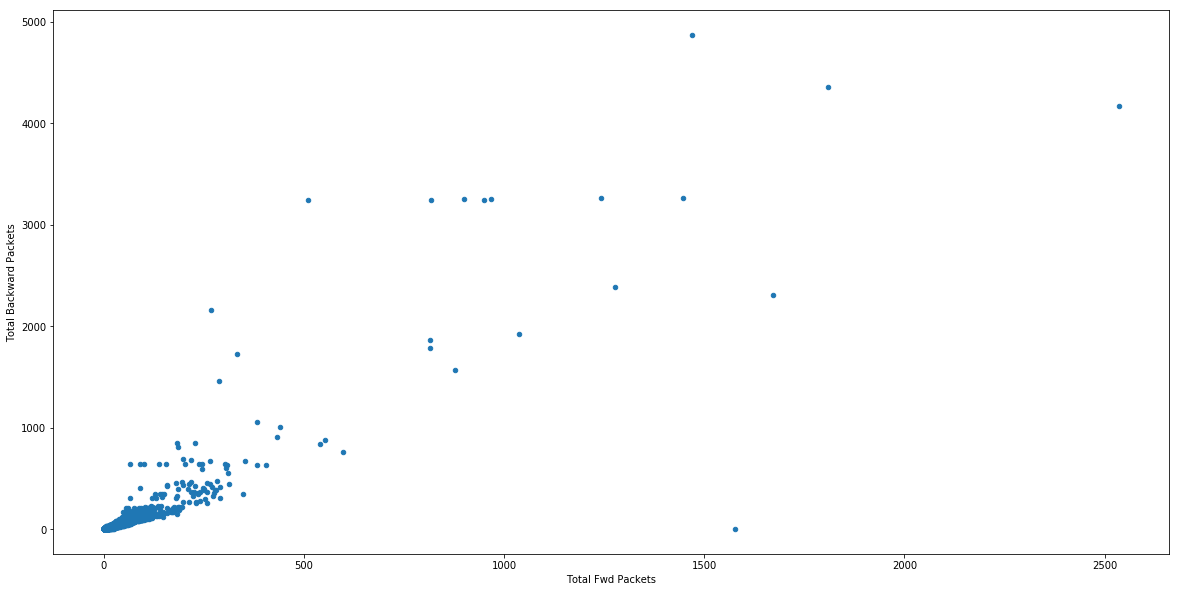

In [18]:
df.plot(kind='scatter', x='Total Fwd Packets', y='Total Backward Packets')

We can learn a lot from each one of these methods, it is our job to understand our goals and do our best to not add bias or miscontrue with the data visualizations.

### Exercise 4

Build your own relationship chart.

# Principles of Data Visualizations

Many people follow the 6 principles of data visualization from Edward Tufte (The Visual Display of Quantitative Information (2nd ed.)).

He gives six principles of graphical integrity. The first two are:
1. The representation of numbers, as physically measured on the
surface of the graphic itself, should be directly proportional to
the numerical quantities measured.
2.  Clear, detailed, and thorough labeling should be used to
defeat graphical distortion and ambiguity. Write out
explanations of the data on the graphic itself. Label important
events in the data.

The classic example to avoid: adding 3d where it isn't necessary

References:
* http://stat.pugetsound.edu/courses/class13/dataVisualization.pdf
* https://python-graph-gallery.com/bad-chart/
* https://eazybi.com/blog/data_analysis_and_visualization/.